### Predicting MBA Salary from Grade in 10th Marks
(File name: MBA Salary.csv) contains the salary of 50 graduating MBA students of a Business School in 2016 and their corresponding percentage marks in grade 10 .
Develop an SLR model to understand and predict salary based on the percentage of marks in Grade 10.

In [13]:
import os
from glob import glob
import pandas as pd
import numpy as np
from scipy import stats


In [ ]:
# loading the MBA Salary Dataset

directory = "C:/Users/**/OneDrive/Desktop/Python/MLUsingPythonBook-main/data"

mba_salary = glob(os.path.join(directory, "MBA*.csv"))

df = pd.read_csv(mba_salary[0])
df.head()


,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


## creating the parameters X and Y

In [16]:
import statsmodels.api as sm

X = sm.add_constant(df['Percentage in Grade 10'] )
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [18]:
Y = df['Salary']

## splitting the data into train and test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_X, test_X, train_y, test_y = train_test_split( X ,
                                                     Y,
                                                    train_size = 0.8,
                                                    random_state = 100 )

## fitting the model

In [21]:
mba_salary_lm = sm.OLS( train_y, train_X ).fit()

In [22]:
# printing the est parameters
print( mba_salary_lm.params )

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [24]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2025-02-28 15:08      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8088 176079.3801
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

## Residual analysis

In [26]:
# checking normality
import matplotlib.pyplot as plt
import seaborn as sn

<Figure size 800x600 with 0 Axes>

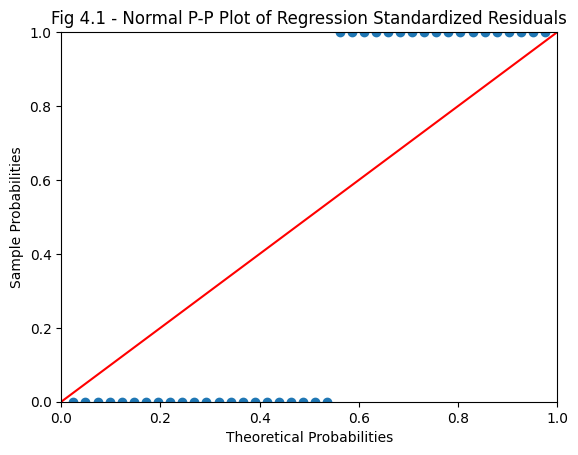

In [27]:
mba_salary_resid = mba_salary_lm.resid
probplot = sm.ProbPlot( mba_salary_resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

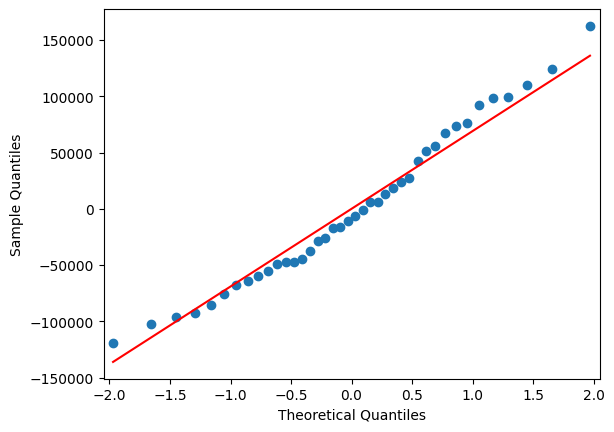

In [28]:
fig = sm.qqplot(mba_salary_lm.resid, line = 's')
plt.show()

In [30]:
def get_standardized_values( vals ):    
    return (vals - vals.mean())/vals.std()

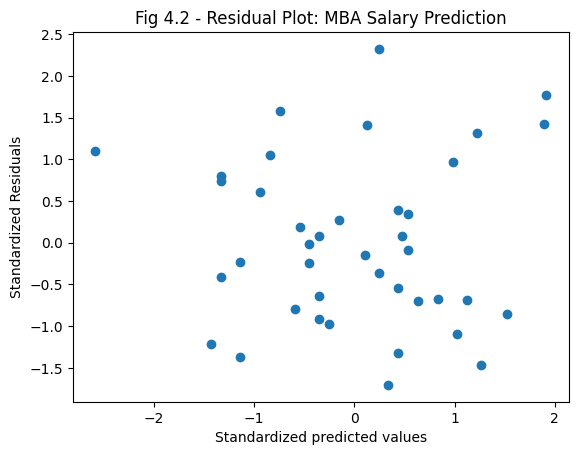

In [31]:
# Check the homoscedasticity assumption
plt.scatter( get_standardized_values( mba_salary_lm.fittedvalues ), 
            get_standardized_values( mba_salary_resid ) )
plt.title( "Fig 4.2 - Residual Plot: MBA Salary Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

## predictions using the model

In [32]:
pred_y = mba_salary_lm.predict( test_X )

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
np.abs(r2_score(test_y, pred_y))

0.156645849742304

In [35]:
np.sqrt(mean_squared_error(test_y, pred_y))

73458.04348346895

In [36]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Predict the y values
pred_y = mba_salary_lm.predict( test_X )

# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( mba_salary_lm, 
                   test_X,
                   alpha = 0.1)

# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'grade_10_perc': test_X['Percentage in Grade 10'],
                            'pred_y': pred_y,
                            'pred_y_left': pred_y_low,
                            'pred_y_right': pred_y_high } )

In [37]:
pred_y_df[0:10]

,grade_10_perc,pred_y,pred_y_left,pred_y_right
6,70.0,279828.402452,158379.831862,401276.973042
36,68.0,272707.227686,151576.714839,393837.740534
37,52.0,215737.829560,92950.942211,338524.716909
28,58.0,237101.353858,115806.869437,358395.838278
43,74.5,295851.045675,173266.083158,418436.008191
49,60.8,247070.998530,126117.560802,368024.436257
5,55.0,226419.591709,104507.444206,348331.739212
33,78.0,308313.101515,184450.060303,432176.142727
20,63.0,254904.290772,134057.999077,375750.582466
42,74.4,295494.986937,172941.528507,418048.445366
